In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
main_df = pd.read_csv('data/netflix_titles.csv')

In [55]:
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [56]:
main_df.shape

(8807, 12)

In [57]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [58]:
main_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

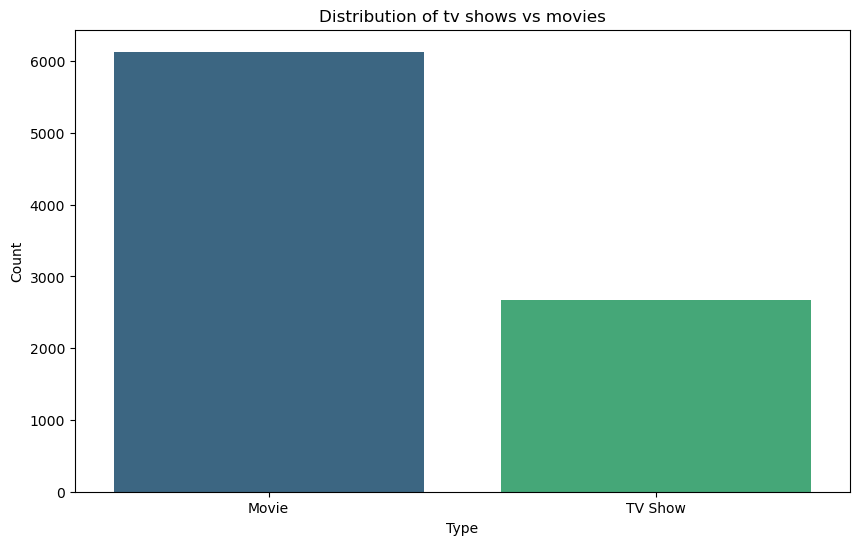

In [59]:
# Distribution of tv show vs movies

plt.figure(figsize=(10,6))
sns.barplot(x='type', y='count', data=main_df['type'].value_counts().reset_index(), palette='viridis')
plt.title('Distribution of tv shows vs movies')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [60]:
main_df.dropna(inplace=True)

In [61]:
main_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [62]:
main_df.duplicated().sum()  

0

In [63]:
main_df.shape

(5332, 12)

In [64]:
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Now we will start doingo some EDA to check for relationships and patterns.First lets check the highest count of directors the most popular directors.

In [65]:
# Check unique values for object columns
for col in ['type', 'rating', 'country']:
    print(f"\nValue counts for {col}:")
    print(main_df[col].value_counts().head(10))



Value counts for type:
type
Movie      5185
TV Show     147
Name: count, dtype: int64

Value counts for rating:
rating
TV-MA    1822
TV-14    1214
R         778
PG-13     470
TV-PG     431
PG        275
TV-G       84
TV-Y7      76
TV-Y       76
NR         58
Name: count, dtype: int64

Value counts for country:
country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64


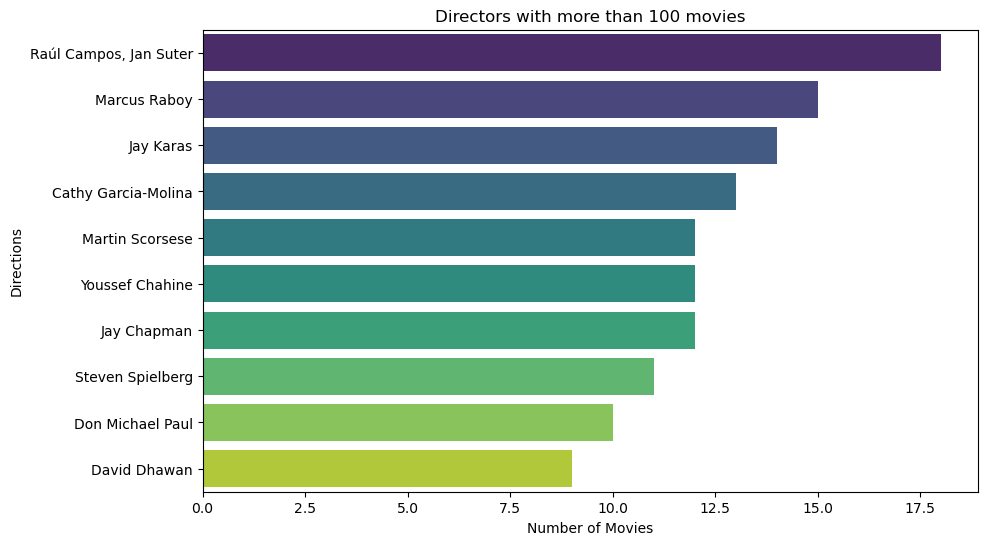

In [66]:
# Create table with directors and by number of movies
directors = main_df['director'].value_counts().reset_index()
directors.columns = ['directors', 'count']
directors = directors.head(10)


#Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='directors', data=directors, palette='viridis')
plt.title('Directors with more than 100 movies')
plt.xlabel('Number of Movies')
plt.ylabel('Directions')
plt.show()

Here we have the top 10 most popular directors for all the movies. Now lets do the same but for actors.

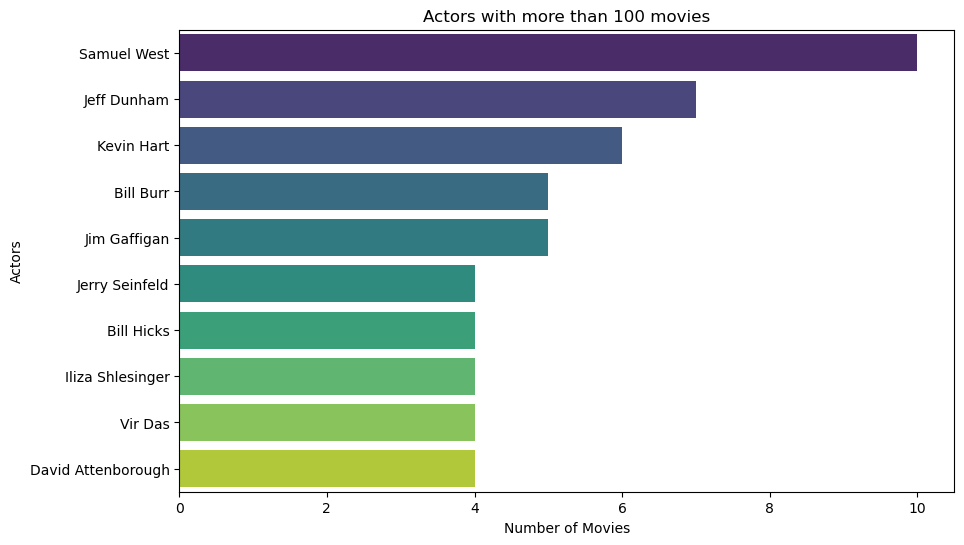

In [67]:
# Create table with actors and by number of movies
actors = main_df['cast'].value_counts().reset_index()
actors.columns = ['factors', 'count']
actors = actors.head(10)

#Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='factors', data=actors, palette='viridis')
plt.title('Actors with more than 100 movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.show()



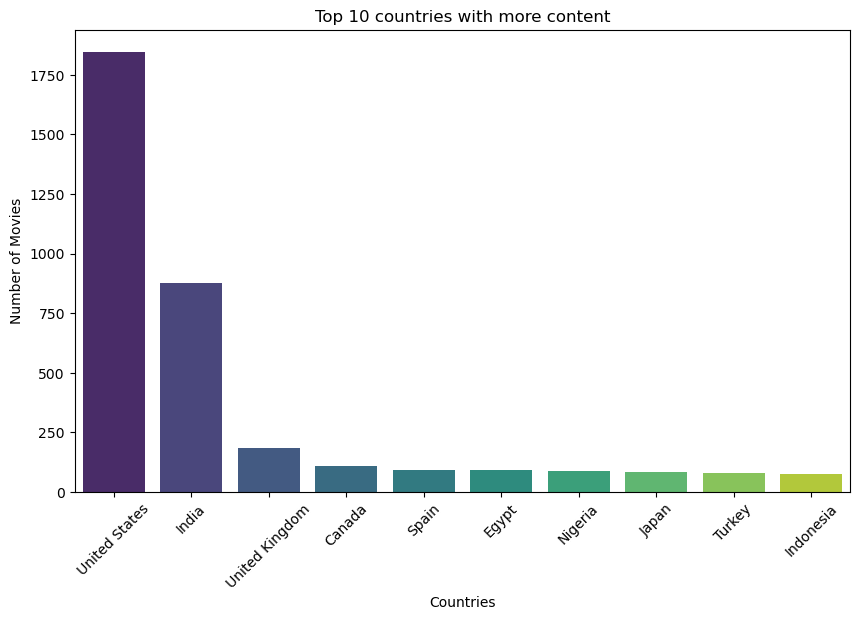

In [76]:
#Top 10 countries with more content

top_countries = main_df['country'].value_counts().head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='count', data=top_countries, palette='viridis')
plt.title('Top 10 countries with more content')
plt.xlabel('Countries')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


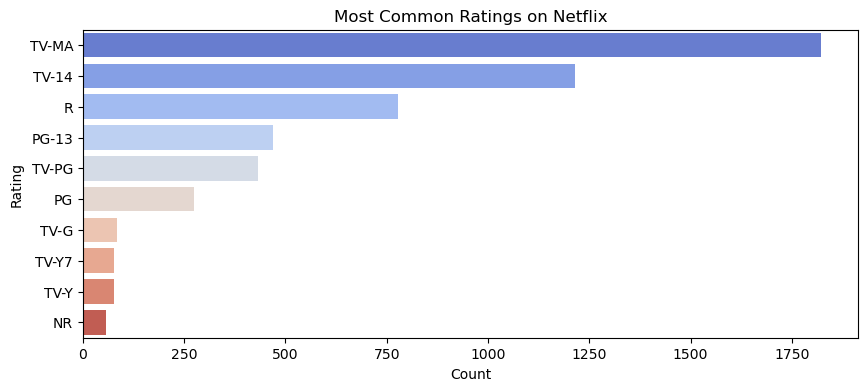

In [79]:
#common ratings

plt.figure(figsize=(10,4))
sns.countplot(data=main_df, y='rating', order=main_df['rating'].value_counts().index[:10], palette='coolwarm')
plt.title('Most Common Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()